<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

In [34]:
import os
import math

from qiskit import IBMQ, Aer, transpile
from qiskit.tools.visualization import plot_histogram
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

IBMQ.save_account(os.environ['IBMQ_TOKEN'], overwrite=True) 

provider = IBMQ.load_account()
provider.backends()
simulator_backend=provider.get_backend('ibmq_qasm_simulator')

def transpile_and_simulate(qc, shots):    
    transpiled_qc = transpile(qc, simulator_backend)
    job = simulator_backend.run(transpiled_qc, shots=shots, memory=True)
    result=job.result()
    return result

ibmqfactory.load_account:WARNING:2024-02-19 21:50:14,060: Credentials are already in use. The existing account in the session will be replaced.


In [35]:
def print_memory(result, header="ALICE - BOB"):
    memory = result.get_memory()
    print(header)
    for mem in memory:
        print(f"{mem[0]} -- {mem[1]}")

# Quantum Random Bit Generator (QRBG) de dos secuencias binarias perfectamente aleatorias

Necesitamos un generador de numeros aleatorios que produzca dos secuencias aleatorias examtamente iguales para dos personas Alice y Bob, con igual probabilidad de obtener 0 o 1 (al 50%)


```
ALICE -------- BOB
0  --------  0
0  --------  0
1  --------  1
1  --------  1
0  --------  0
1  --------  1
1  --------  1
.
.
.
```

Para ello debes de crear un circuito cuantico de dos qbits que produzca bits clasicos en cada medida para Alice y Bob.

Ejecuta el circuito en un simulador cuantico y obten:

* los primeros 100 bits de ambas personas
* el histograma de bits medidos en la ejecucion que demuestra que se generan 0 y 1 para Alice y Bob entrelazados y al 50%






PASO 1 - Creamos el circuito desde el Composer

In [36]:
#BUILD A CIRCUIT AND MEASUREMENT
qreg_q=QuantumRegister(2,'q')
creg_c=ClassicalRegister(2,'c')
qc= QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.cx(qreg_q[0],qreg_q[1])

qc.measure(qreg_q,creg_c)

PASO 2 - Lo ejecutamos en el simulador

In [37]:
results = transpile_and_simulate(qc, 100)

PASO 3 - Vemos los resultados

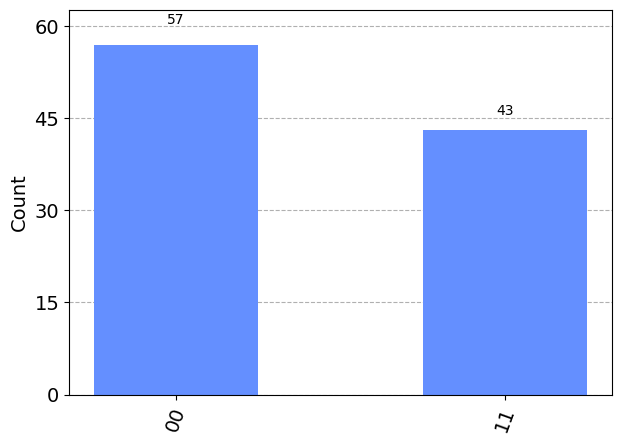

ALICE - BOB
0 -- 0
1 -- 1
0 -- 0
1 -- 1
1 -- 1
0 -- 0
0 -- 0
0 -- 0
1 -- 1
1 -- 1
1 -- 1
0 -- 0
0 -- 0
0 -- 0
1 -- 1
1 -- 1
1 -- 1
0 -- 0
1 -- 1
0 -- 0
1 -- 1
0 -- 0
1 -- 1
1 -- 1
0 -- 0
0 -- 0
0 -- 0
1 -- 1
1 -- 1
1 -- 1
0 -- 0
1 -- 1
1 -- 1
0 -- 0
1 -- 1
0 -- 0
1 -- 1
1 -- 1
0 -- 0
1 -- 1
1 -- 1
0 -- 0
0 -- 0
0 -- 0
1 -- 1
0 -- 0
0 -- 0
0 -- 0
0 -- 0
1 -- 1
1 -- 1
1 -- 1
0 -- 0
0 -- 0
0 -- 0
1 -- 1
1 -- 1
0 -- 0
1 -- 1
0 -- 0
1 -- 1
0 -- 0
0 -- 0
0 -- 0
1 -- 1
0 -- 0
0 -- 0
1 -- 1
0 -- 0
0 -- 0
1 -- 1
0 -- 0
1 -- 1
0 -- 0
0 -- 0
0 -- 0
0 -- 0
0 -- 0
0 -- 0
0 -- 0
1 -- 1
0 -- 0
0 -- 0
0 -- 0
0 -- 0
0 -- 0
0 -- 0
1 -- 1
0 -- 0
1 -- 1
1 -- 1
0 -- 0
0 -- 0
0 -- 0
1 -- 1
0 -- 0
1 -- 1
0 -- 0
1 -- 1
1 -- 1


In [38]:
display(plot_histogram(results.get_counts()))
print_memory(results)

# Quantum Random Bit Generator (QRBG) de dos secuencias binarias condicionadas

Necesitamos un generador de numeros aleatorios que produzca dos secuencias aleatorias examtamente para dos personas Alice y Bob, con probabilidades diferentes y entrelazadas:
- Alice obtine una secuencia con igual probabilidad de obtener 0 o 1 (al 50%)
- si Alice obtiene un 0, Bob obtiene una probabilidad de 0 y 1 al 85% y 15% respectivamente.
- si Alice ontiene un 1, Bob obtiene una probabilidad de 1 y 0 al 85% y 15% respectivamente.


```
ALICE -------- BOB
0  --------  0
0  --------  0
1  --------  0
1  --------  1
1  --------  0
0  --------  1
1  --------  1
1  --------  1
1  --------  1
0  --------  0
1  --------  1
0  --------  0
1  --------  1
1  --------  1
1  --------  1
.
.
.
```

Para ello debes de crear un circuito cuantico de dos qbits que produzca bits clasicos en cada medida para Alice y Bob.

Ejecuta el circuito en un simulador cuantico y obten:

* los primeros 100 bits de ambas personas
* el histograma de bits medidos en la ejecucion

PASO 1 - Creamos el circuito desde el Composer

In [39]:
#BUILD A CIRCUIT AND MEASUREMENT
qreg_q=QuantumRegister(2,'q')
creg_c=ClassicalRegister(2,'c')
qc= QuantumCircuit(qreg_q,creg_c)

qc.h(qreg_q[0])
qc.cx(qreg_q[0],qreg_q[1])
qc.ry(math.pi/4, qreg_q[1])

qc.measure(qreg_q,creg_c)

PASO 2 - Lo ejecutamos en el simulador

In [40]:
results = transpile_and_simulate(qc, 100)

PASO 3 - Vemos los resultados

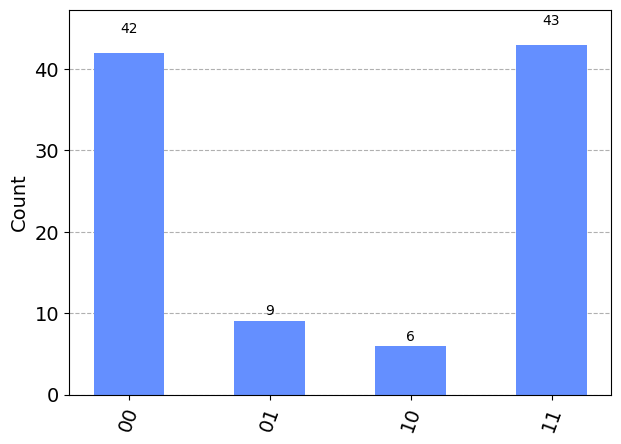

ALICE - BOB
1 -- 1
1 -- 1
0 -- 1
0 -- 0
1 -- 1
0 -- 0
1 -- 1
1 -- 1
1 -- 1
1 -- 1
0 -- 0
1 -- 1
0 -- 0
0 -- 0
0 -- 0
1 -- 1
0 -- 0
1 -- 1
0 -- 0
0 -- 0
1 -- 1
0 -- 0
1 -- 1
0 -- 0
0 -- 0
1 -- 1
1 -- 1
0 -- 0
0 -- 0
0 -- 1
0 -- 0
1 -- 0
1 -- 1
1 -- 1
0 -- 0
0 -- 0
0 -- 0
1 -- 1
0 -- 0
1 -- 0
0 -- 0
0 -- 1
1 -- 1
1 -- 1
0 -- 0
1 -- 1
1 -- 1
1 -- 1
0 -- 0
0 -- 0
1 -- 1
1 -- 1
1 -- 1
0 -- 1
0 -- 0
0 -- 1
1 -- 0
0 -- 0
0 -- 1
0 -- 0
1 -- 1
1 -- 1
1 -- 1
1 -- 1
0 -- 1
0 -- 0
1 -- 1
1 -- 0
0 -- 0
1 -- 1
0 -- 0
0 -- 0
0 -- 0
1 -- 1
0 -- 0
1 -- 1
1 -- 1
1 -- 1
0 -- 0
1 -- 1
1 -- 1
1 -- 1
0 -- 0
0 -- 1
1 -- 0
0 -- 0
0 -- 1
1 -- 1
0 -- 0
1 -- 1
1 -- 1
0 -- 0
0 -- 0
1 -- 0
1 -- 1
0 -- 0
0 -- 0
1 -- 1
0 -- 0
0 -- 0


In [41]:
display(plot_histogram(results.get_counts()))
print_memory(results)